## VGG Architecture Implementation
- Source Literature: [VGGNet Paper](https://arxiv.org/pdf/1409.1556.pdf)

In [1]:
import os

os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

import tensorflow as tf

# VGG Architecture Implementations

In [2]:
def conv3_unit(filters, inputs):
    return tf.keras.layers.Conv2D(
        filters=filters,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu"
    )(inputs)

def conv1_unit(filters, inputs):
    return tf.keras.layers.Conv2D(
        filters=filters,
        kernel_size=(1, 1),
        strides=(1, 1),
        padding="same",
        activation="relu"
    )(inputs)

def maxpool_unit(inputs):
    return tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(inputs)

def flatten_unit(inputs):
    return tf.keras.layers.Flatten()(inputs)

def fc_unit(units, inputs):
    fc_out = tf.keras.layers.Dense(units=units, activation="relu")(inputs)
    return tf.keras.layers.Dropout(rate=0.5)(fc_out)

def fc_final(units, inputs):
    fc_out = tf.keras.layers.Dense(units=units, activation=None)(inputs)
    return tf.keras.layers.Softmax(dtype=tf.float32)(fc_out)

## Architecture A - VGG 11

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       590080

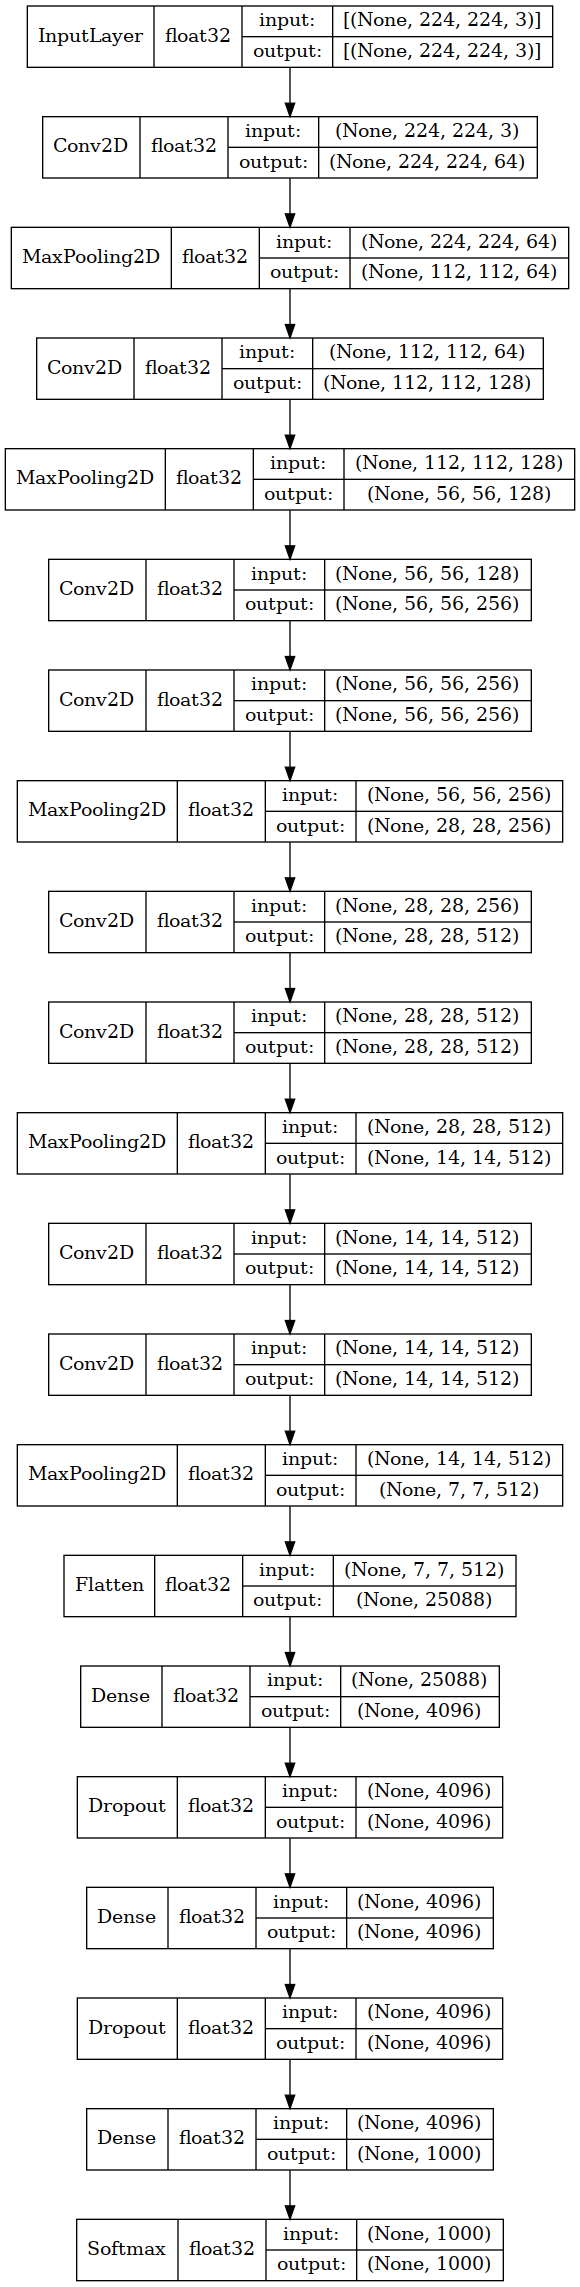

In [3]:
# VGG 11 Architecture A

# Input Layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Segment 1
hidden = conv3_unit(64, inputs)
hidden = maxpool_unit(hidden)

# Segment 2
hidden = conv3_unit(128, hidden)
hidden = maxpool_unit(hidden)

# Segment 3
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = maxpool_unit(hidden)

# Segment 4
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# Segment 5
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# FC Segment
hidden = flatten_unit(hidden)
hidden = fc_unit(4096, hidden)
hidden = fc_unit(4096, hidden)
outputs = fc_final(1000, hidden)

vgg_11_net_a = tf.keras.models.Model(inputs=inputs, outputs=outputs)

vgg_11_net_a.summary()
tf.keras.utils.plot_model(vgg_11_net_a, show_layer_names=False, show_shapes=True, show_dtype=True)

## Architecture B - VGG 13

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 256)       2951

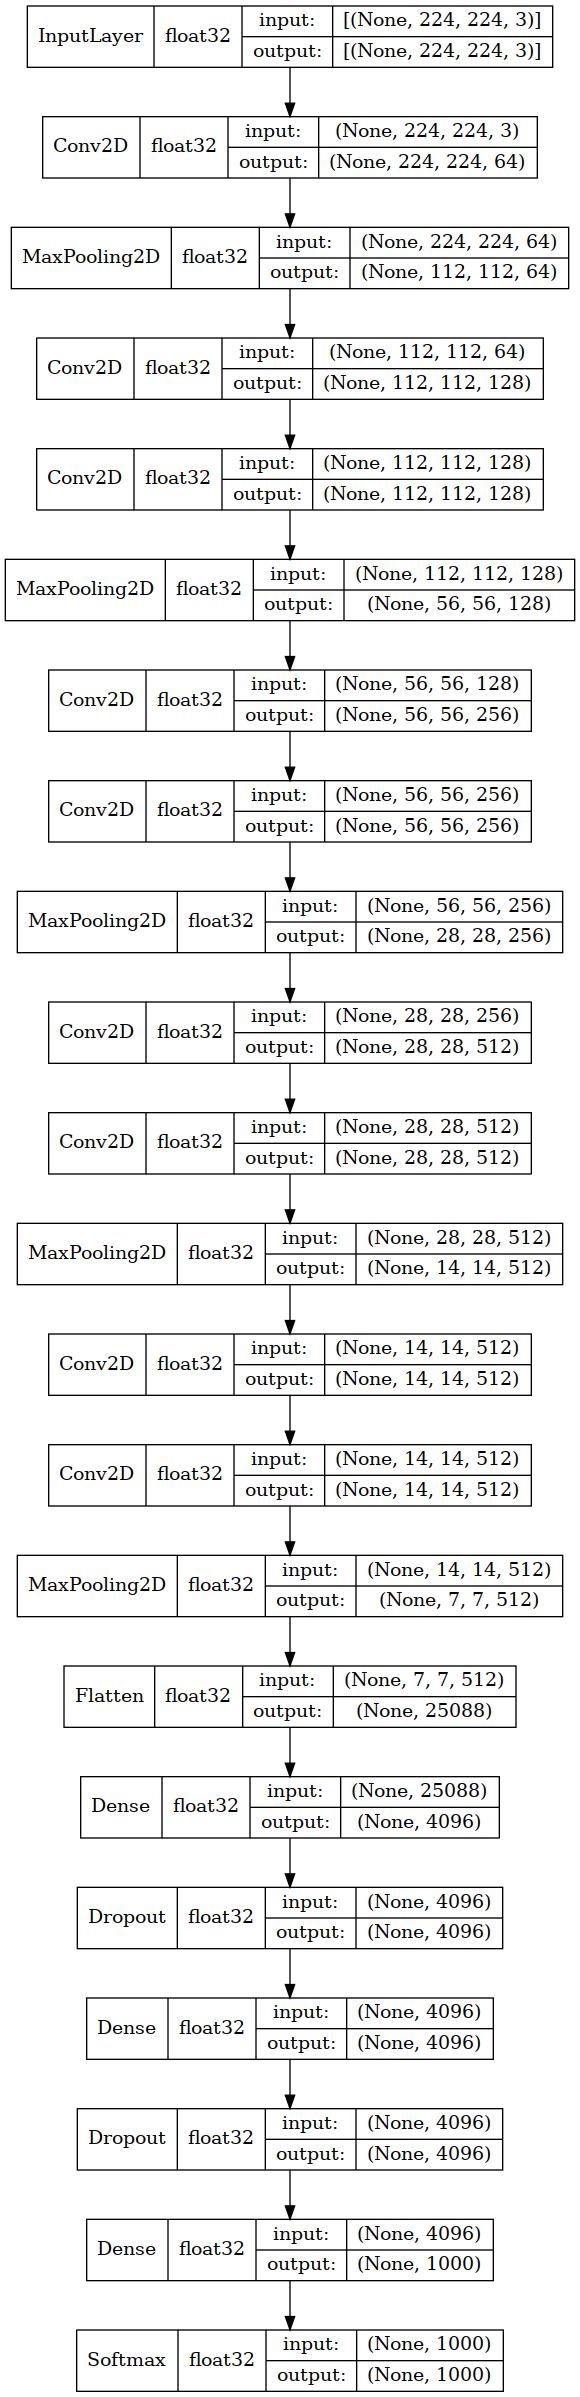

In [4]:
# VGG 16 Architecture B

# Input Layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Segment 1
hidden = conv3_unit(64, inputs)
hidden = conv3_unit(64, inputs)
hidden = maxpool_unit(hidden)

# Segment 2
hidden = conv3_unit(128, hidden)
hidden = conv3_unit(128, hidden)
hidden = maxpool_unit(hidden)

# Segment 3
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = maxpool_unit(hidden)

# Segment 4
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# Segment 5
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# FC Segment
hidden = flatten_unit(hidden)
hidden = fc_unit(4096, hidden)
hidden = fc_unit(4096, hidden)
outputs = fc_final(1000, hidden)

vgg_13_net_b = tf.keras.models.Model(inputs=inputs, outputs=outputs)

vgg_13_net_b.summary()
tf.keras.utils.plot_model(vgg_13_net_b, show_layer_names=False, show_shapes=True, show_dtype=True)

## Architecture C - VGG 16

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 56, 56, 256)       2951

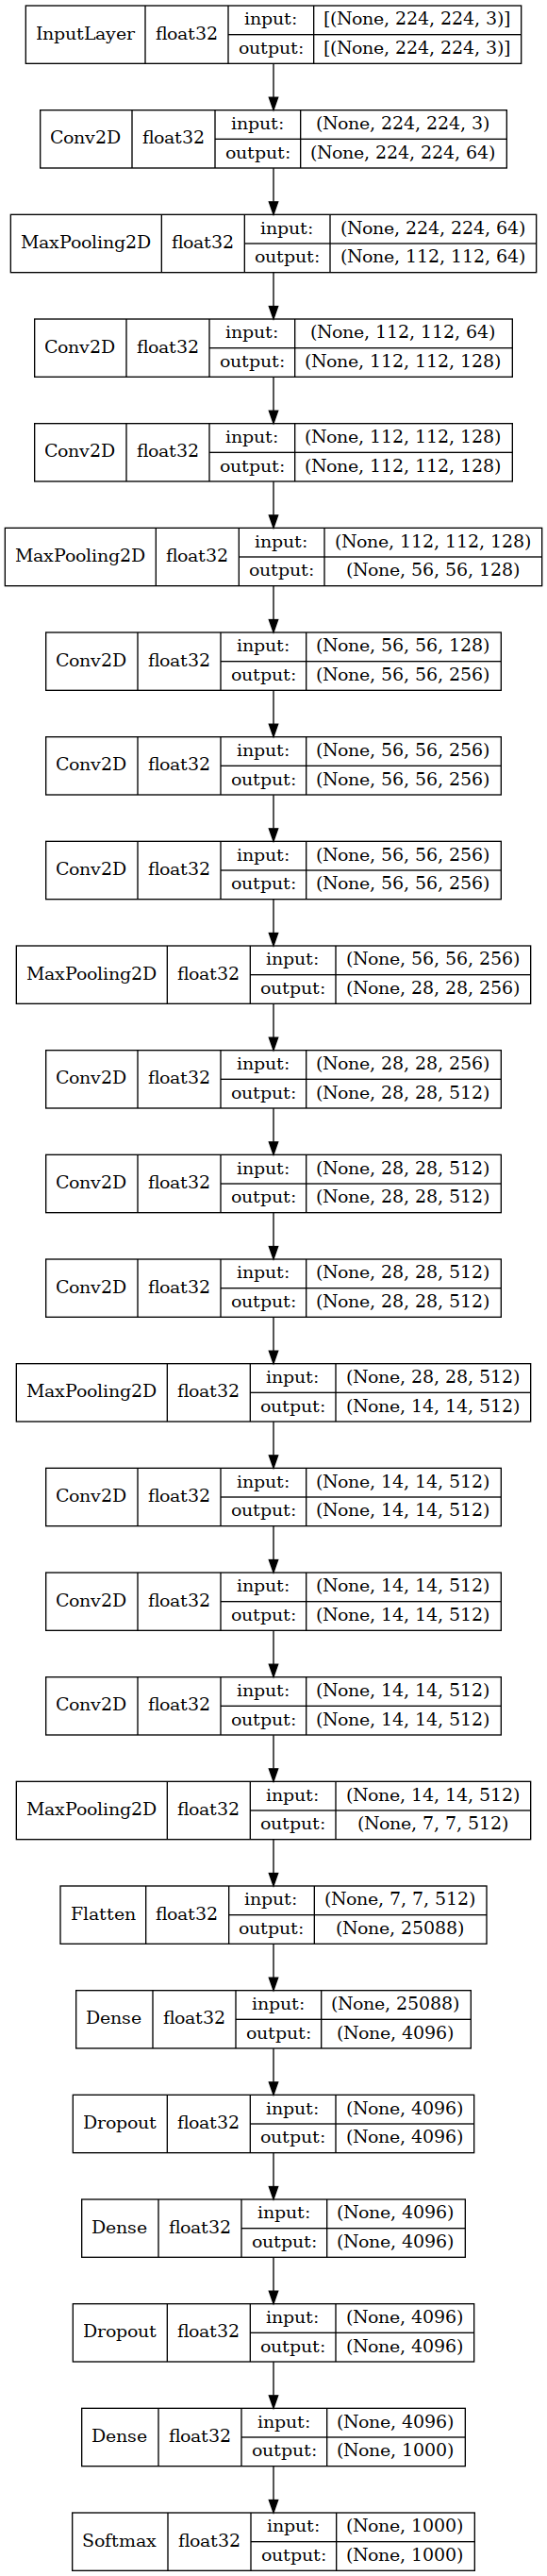

In [5]:
# VGG 16 Architecture C

# Input Layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Segment 1
hidden = conv3_unit(64, inputs)
hidden = conv3_unit(64, inputs)
hidden = maxpool_unit(hidden)

# Segment 2
hidden = conv3_unit(128, hidden)
hidden = conv3_unit(128, hidden)
hidden = maxpool_unit(hidden)

# Segment 3
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = conv1_unit(256, hidden)
hidden = maxpool_unit(hidden)

# Segment 4
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv1_unit(512, hidden)
hidden = maxpool_unit(hidden)

# Segment 5
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv1_unit(512, hidden)
hidden = maxpool_unit(hidden)

# FC Segment
hidden = flatten_unit(hidden)
hidden = fc_unit(4096, hidden)
hidden = fc_unit(4096, hidden)
outputs = fc_final(1000, hidden)

vgg_16_net_c = tf.keras.models.Model(inputs=inputs, outputs=outputs)

vgg_16_net_c.summary()
tf.keras.utils.plot_model(vgg_16_net_c, show_layer_names=False, show_shapes=True, show_dtype=True)

## Architecture D - VGG 16

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 56, 56, 256)       2951

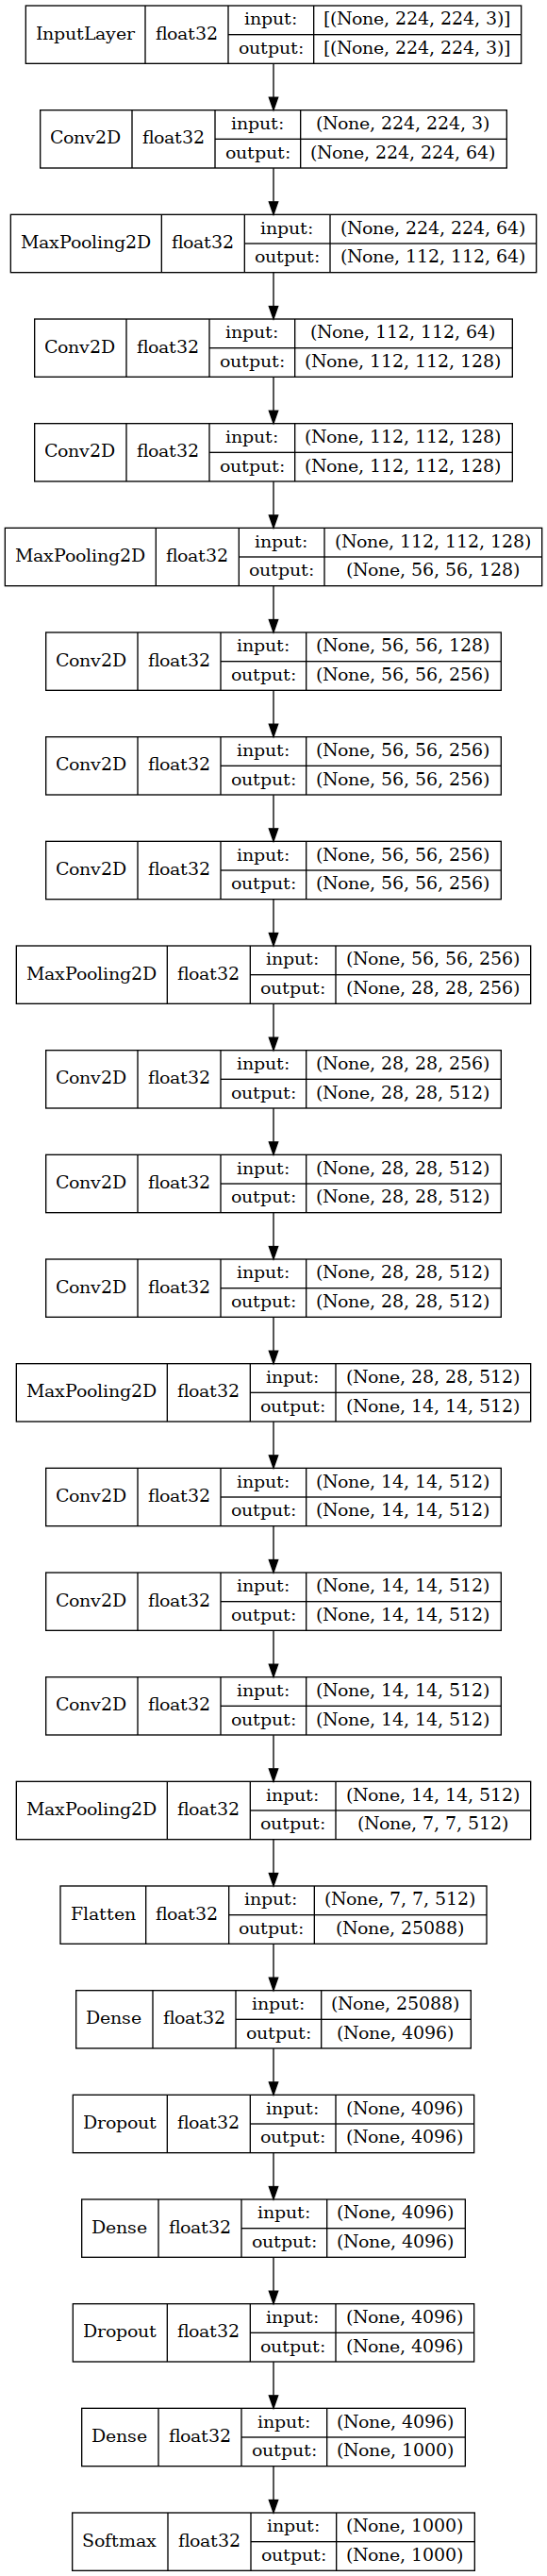

In [6]:
# VGG 16 Architecture D

# Input Layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Segment 1
hidden = conv3_unit(64, inputs)
hidden = conv3_unit(64, inputs)
hidden = maxpool_unit(hidden)

# Segment 2
hidden = conv3_unit(128, hidden)
hidden = conv3_unit(128, hidden)
hidden = maxpool_unit(hidden)

# Segment 3
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = maxpool_unit(hidden)

# Segment 4
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# Segment 5
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# FC Segment
hidden = flatten_unit(hidden)
hidden = fc_unit(4096, hidden)
hidden = fc_unit(4096, hidden)
outputs = fc_final(1000, hidden)

vgg_16_net_d = tf.keras.models.Model(inputs=inputs, outputs=outputs)

vgg_16_net_d.summary()
tf.keras.utils.plot_model(vgg_16_net_d, show_layer_names=False, show_shapes=True, show_dtype=True)

## Architecture E - VGG 19

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 56, 56, 256)       2951

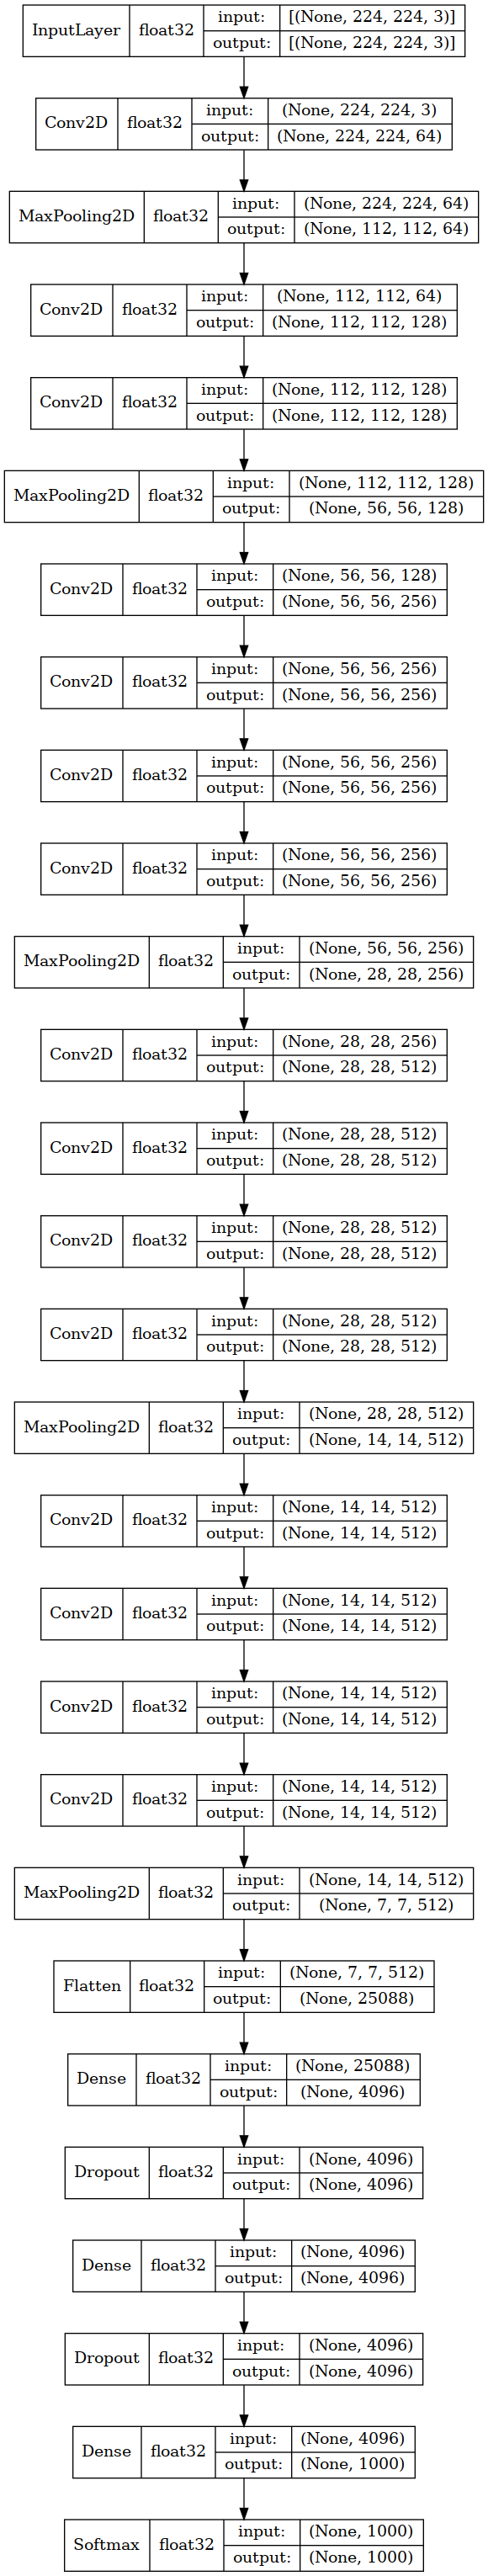

In [7]:
# VGG 19 Architecture E

# Input Layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Segment 1
hidden = conv3_unit(64, inputs)
hidden = conv3_unit(64, inputs)
hidden = maxpool_unit(hidden)

# Segment 2
hidden = conv3_unit(128, hidden)
hidden = conv3_unit(128, hidden)
hidden = maxpool_unit(hidden)

# Segment 3
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = conv3_unit(256, hidden)
hidden = maxpool_unit(hidden)

# Segment 4
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# Segment 5
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = conv3_unit(512, hidden)
hidden = maxpool_unit(hidden)

# FC Segment
hidden = flatten_unit(hidden)
hidden = fc_unit(4096, hidden)
hidden = fc_unit(4096, hidden)
outputs = fc_final(1000, hidden)

vgg_19_net_e = tf.keras.models.Model(inputs=inputs, outputs=outputs)

vgg_19_net_e.summary()
tf.keras.utils.plot_model(vgg_19_net_e, show_layer_names=False, show_shapes=True, show_dtype=True)